In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Introduction à la manipulation et à l'analyse d'images en Python

La manipulation et l'analise d'images en python est réaliser à l'aide du module [scikit-image](https://scikit-image.org/), qui un des nombreux projets de base de [scipy stack](https://www.scipy.org/docs.html). Il éxiste d'autres module permettant de réaliser de l'analise d'image tel que [Pillow](https://python-pillow.org/), [SimpleITK](https://simpleitk.org/), et tant d'autres.

Ce module est un dès plus utilisé pour la manipulation et l'analise d'image en python. La toute première version de scikit-image remonte à août 2009. La version actuelle, et celle utilisé dans cette démonstration de l'utilisation du module, est la version 0.18.3. Le dépot GitHub du projet scikit-image est consultable [ici](https://github.com/scikit-image).

Il est principalement utilisé pour réaliser de la segmentation, du filtrage, de la transformation que nous allons aborder au cours de cette introduction. L'installation du module à partir des gestionnaires de packages [pip](https://pypi.org/) et [conda](https://anaconda.org/) à l'aide des commandes suivantes.  

```bash
# installation with conda :
conda install -c conda-forge scikit-image

# installation with pip :
## Debian/Ubuntu :
sudo apt-get install python-skimage
## OSX :
pip install scikit-image
```

## Contexte

La miscroscopie est une technologie qui permet de stimuler les découvertes en biologie. Aujourd'hui beaucoup de résultats basé sur des images de microscopie demande une analyse quantitative. Il est donc nécéssaire de réaliser l'interprétation quantitative du contenu des images en microscopie et détecter automatiquement les objets et réaliser des mesures sur ses objets. Tout comme en génétique l'imagerie génère enormément de données. On pourrais parler de "microscomique", comme on parle de génomique pour l'analyse de données massive en génétique ou de protéomique et métabolomique.




## Objectifs

L'objectif est d'explorer en surface le module scikit-image. Nous allons donc réaliser une segmentation de l'image (détection des objets de l'image), Nous monterrons comment fitrer les objets abérants. Nous réaliseront aussi une identification des noyaux, et déterminerons la corespondance cellulaire des fluorochromes. Ensuite nous réaliserons des mesures simple de la taille, la fluorescence, la gralunométrie des objets de d'une image.

## Comment est codée informatiquement une image ?

En informatique, une image constitue une représentation binaire d'une information visuelle. Cette information peut être un dessin, une image ou encore un graphe. Afin qu'un ordinateur puisse stocker une image, chaque pixel de cette dernière sera représenté par une valeur ou un tuple de valeur. S'il s'agit d'une image en noir et blanc (niveaux de gris), chaque pixel est représenté par un nombre décimal compris entre 0 et 1, sachant que la valeur 0 correspond à un pixel éteint (couleur noir) et 1 à un pixel alumé (couleur blanche). S'il s'agit d'une image en couleur, plus précisement en rgb, chaque pixel est représenté par un tuple de 3 entiers compris entre 0 et 255.  

Le nombre de bits utilisé définie le nombre de couleur présent dans une image. Nous considérons que pour un nombre x de bits nous aurons 2x couleurs dans notre image.  
Ci-dessous deux exemples de représentation d'une image :  

- Dans le premier exemple nous allons créer un tableau contenant des valeurs dans le but de créer une image en noir et blanc.

Le tableau permettant la création de l'image est le suivant : 
[[1.  1.  1.  1.  1.  1. ]
 [1.  0.5 1.  1.  0.5 1. ]
 [1.  0.  1.  1.  0.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  0.  0.  0.  0.  1. ]
 [1.  1.  1.  1.  1.  1. ]]



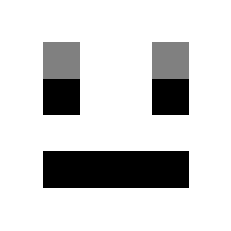

In [10]:
smiley = np.array([[1,1,1,1,1,1],
                  [1,0.5,1,1,0.5,1],
                   [1,0,1,1,0,1],
                  [1,1,1,1,1,1],
                  [1,0,0,0,0,1],
                  [1,1,1,1,1,1]])

print(f"Le tableau permettant la création de l'image est le suivant : "
      f"\n{smiley}\n")
plt.imshow(smiley, cmap = plt.get_cmap("gray"))
plt.axis('off');

Ainsi, ci-dessus nous pouvons observer comment nous pouvons passer simplement d'un tableau contenant des valeurs à la création d'une image.  

- Dans un second exemple, nous allons voir comment refaire cette même image mais cette fois-ci en lui rajoutant des couleurs. Pour faire cela nous utiliserons un tableau contenant le code couleur RGB (pour *Red, Green, Blue*). Ce code correspond à un tuple contenant trois valeurs pour chacune des trois couleurs allant de 0 (cas où le pixel est éteint) à 255 (cas où le pixel est allumé).

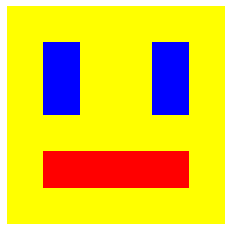

In [21]:
smiley_color = np.array([[(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0)],
                       [(255,255,0),(0,0,255),(255,255,0),(255,255,0),(0,0,255),(255,255,0)],
                       [(255,255,0),(0,0,255),(255,255,0),(255,255,0),(0,0,255),(255,255,0)],
                       [(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0)],
                       [(255,255,0),(255,0,0),(255,0,0),(255,0,0),(255,0,0),(255,255,0)],
                       [(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0),(255,255,0)]],
                       )

plt.imshow(smiley_color)
plt.axis("off");

## Quelles différences y a-t-il entre une image au format .tif et des formats d’images plus communs comme le .jpeg ? Quel intérêt d’utiliser le premier format en microscopie ?

Dans le cadre de notre analyse d’image nous disposons d'une image de microscopie à fluorescence au format .tif.  

Une image peut être stockée sous différents formats comme par exemple les formats : .jpeg, .png, .gif et .tif, etc. La principale différence entre le format .tif et les autres formats qui sont des formats plus communément utilisés est la suivante.  
Le format TIFF ne présente pas de compression, dans le cas où il y aurait une compression cela n’impacte pas la qualité de l’image observée. Ce manque de compression implique que la taille du fichier sera élevée. Le format .tif est donc utilisé pour avoir des images de haute résolution/qualité qui permet d’avoir des images avec des détails important ce qui est idéal pour observer des images de microscopie.



- Comment est composée l’image fournie dans comme donnée (différents canaux) ?  (tristan)
- Comment ouvrir et afficher l’image avec scikit-image ? (tristan)

## Ressources

- Vidéo Scipy 16/06/2019 : [Image Analysis in Python with SciPy and Scikit Image](https://www.youtube.com/watch?v=d1CIV9irQAY), consulté le 15/10/2021.  

Ressource contruite sous la forme d'un cours interactif. Cela permet de comprendre le module car on peut suivre et reproduire les démonstrations sur notre machine. Malheureusement, certaines fonctions et commmandes ne fonctionnent plus de la même manière aujourd'hui, car ils utilisent la version 0.15, alors que la version la plus récente au moment de la création de notre environement de travail (09/10/2021) est la version 0.18.3.  

- TD d’analyse d’image de microscopie, 2017, Griffin Chure: [TD Caltech](https://bi1.caltech.edu/code/t04_quantitative_image_processing.html), consulté le 17/10/2021.  

Ressource trés pertinente, puisque qu'il s'agit d'une analyse d'image en microscopie à fluorecsence d'_E.coli_ semblable à notre projet.  


- [GitHub de scikit-image](https://github.com/scikit-image), consulté le 16/10/2021.  

Repository GitHub du module scikit-image. Il propose plusieurs tutoriels et démonstrations du module.  

- site web de la bibliothèque [scikit-image](https://scikit-image.org), consulté le 10/10/2021.  

Site du module, incluant toutes la documantations du module et de ses fonctions. Ainsi qu'un petit nombre de tutoriels qui pourraient nous être utiles.  

- site web : (https://scipy-lectures.org/packages/scikit-image/index.html), consulté le 16/10/2021.  

Tutoriels court, permettant la prise en main du module scikit-image. Ce qui nous a permis de comprendre comment est représenter une image en Python.  

- [forum sur image.sc](https://forum.image.sc/tag/scikit-image), consulté le 17/10/2021.  

Forum destiné uniquement au module scikit-image, qui sera probablement utile lors d'erreurs d'utilisation des fonctions du module.  

- [publication (van der Walt *et al*., 2014)](http://dx.doi.org/10.7717/peerj.453), consulté le 15/10/2021.  

Publication du module, avec présence d'exemples d'utilisation du module dans différents domaines d'applications.